<a href="https://colab.research.google.com/github/GitAd7/AI_Engineer_Task/blob/main/Donation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Connecting the Notebook to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Accessing the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

- Reading the excel dataset using pandas read_csv function

In [26]:
donation = pd.read_excel('/content/drive/MyDrive/Donation-Prediction/RCCFile.xlsx')

In [27]:
# Showing the first 5 rows
donation.head()

,customer_ID,First Giving Date,Last Giving Date,Largest Giving Date,date_added,Date_Changed,Key Indicator,Deceased,Title_1,Marital_status,...,CR_1_01_Degree,CR_1_02_Degree,Al Board Member,Married to an Alum,Personal Email End,Overall Giving,Last 10 Years Giving,Last 5 Years Giving_17-21,CSS_ID,Alumni
0,200001488,NaT,NaT,NaT,2019-10-14,2021-10-11,I,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
1,200001489,NaT,NaT,NaT,2019-10-14,2021-10-11,I,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0
2,200001490,NaT,NaT,NaT,2019-10-14,2021-10-12,I,No,NaN,NaN,...,NaN,NaN,NaN,NaN,.com,0.0,0.0,0.0,200000613.0,0
3,200001491,NaT,NaT,NaT,2019-10-14,2021-10-12,I,No,NaN,NaN,...,NaN,NaN,NaN,NaN,.com,0.0,0.0,0.0,NaN,0
4,200001492,NaT,NaT,NaT,2019-10-14,2021-10-11,I,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0


In [28]:
donation.shape

(42287, 31)

In [29]:
donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42287 entries, 0 to 42286
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_ID                42287 non-null  int64         
 1   First Giving Date          15214 non-null  datetime64[ns]
 2   Last Giving Date           15214 non-null  datetime64[ns]
 3   Largest Giving Date        15214 non-null  datetime64[ns]
 4   date_added                 42287 non-null  datetime64[ns]
 5   Date_Changed               42287 non-null  datetime64[ns]
 6   Key Indicator              42287 non-null  object        
 7   Deceased                   42287 non-null  object        
 8   Title_1                    13260 non-null  object        
 9   Marital_status             17302 non-null  object        
 10  City                       41020 non-null  object        
 11  State                      40913 non-null  object        
 12  even

In [30]:
print("\nMissing values:\n", donation.isnull().sum())


Missing values:
 customer_ID                      0
First Giving Date            27073
Last Giving Date             27073
Largest Giving Date          27073
date_added                       0
Date_Changed                     0
Key Indicator                    0
Deceased                         0
Title_1                      29027
Marital_status               24985
City                          1267
State                         1374
events attended                  0
Zip                           1372
Prf_Type                         0
CC_1_01_CodeLong              4882
CC_1_02_CodeLong             37625
CC_1_03_CodeLong             42088
CC_1_04_CodeLong             42280
CS_RecordImportID            42162
CR_1_01_Class_of             25089
CR_1_01_Degree               22619
CR_1_02_Degree               40373
Al Board Member              42259
Married to an Alum           41713
Personal Email End           18106
Overall Giving                   0
Last 10 Years Giving             0
La

**Analysis**
- The shape of our data is 42287 and by printing the nulls count in each column we get that there are some columns which have nearly or even very close count of nulls as same of our data shape.

**Results**
- Through this analysis i decided to drop those columns with very high nulls count.

- But to get the more robust idea of data and nulls i will also calculate the percentage of nulls which will help in delivering the same info with more preciseness and will help in faster decision making.

In [31]:
def missing_data_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = missing_data_percentage(donation)
print("Percentage of missing data:")
print(missing_data)

Percentage of missing data:
                           Total    Percent
CC_1_04_CodeLong           42280  99.983446
Al Board Member            42259  99.933786
CS_RecordImportID          42162  99.704401
CC_1_03_CodeLong           42088  99.529406
Married to an Alum         41713  98.642609
CR_1_02_Degree             40373  95.473786
CSS_ID                     39885  94.319767
CC_1_02_CodeLong           37625  88.975335
Title_1                    29027  68.642845
Last Giving Date           27073  64.022040
Largest Giving Date        27073  64.022040
First Giving Date          27073  64.022040
CR_1_01_Class_of           25089  59.330291
Marital_status             24985  59.084352
CR_1_01_Degree             22619  53.489252
Personal Email End         18106  42.816941
CC_1_01_CodeLong            4882  11.544919
State                       1374   3.249226
Zip                         1372   3.244496
City                        1267   2.996193
Overall Giving                 0   0.000000
Last

In [32]:
# Checking the content of the column for more robust decision making
donation['CC_1_01_CodeLong'].unique()

array(['Friend', 'Alumni', 'Current Fac/Staff', 'Education Certificate',
       'Prospective Benefactor', 'Former Fac/Staff', 'Business', nan,
       'Parent', 'Friends / Memorial', 'Unknown - Historical',
       'Trust / Friend', 'Foundation', 'Student', 'Friends / Athletics',
       'Friends / Agency', 'Trust / Alumni', 'Organization',
       'Cutting Edge Alumni', 'Religious Org', 'Previous Board', 'Board',
       'Class Year Alumni', 'Government',
       'Board of Visitors Advisory Group', 'Trust / Business', 'WAICU',
       'Dominican Colleges and Universities', 'Trust', 'Current Student'],
      dtype=object)

**Final Assessment for Nulls**
- After seeing the percentage of nulls value i have decided to drop the columns with more than 30% of nulls.

In [37]:
donation['Zip'].unique()

array([nan, '53717-1215', '55901-2590', ..., '80301-4203', '53597-1205',
       10000], dtype=object)

In [51]:
def preprocess_data(df):
    # Convert date columns to datetime
    date_cols = ['First Giving Date', 'Last Giving Date', 'Largest Giving Date', 'date_added', 'Date_Changed']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Convert date columns to numeric (days since epoch)
    for col in date_cols:
        if col in df.columns:
            df[col] = (df[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

    # Ensure Zip, City, and State are strings to avoid comparison issues
    df['Zip'] = df['Zip'].astype(str)
    df['State'] = df['State'].astype(str)
    df['City'] = df['City'].astype(str)

    # Fill missing Zips based on State and City combinations using transform() to preserve the index
    df['Zip'] = df.groupby(['State', 'City'])['Zip'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # Fill missing City based on State and Zip combinations using transform()
    df['City'] = df.groupby(['State', 'Zip'])['City'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # Fill missing State based on City and Zip combinations using transform()
    df['State'] = df.groupby(['City', 'Zip'])['State'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # Handle remaining missing values for categorical and numeric columns
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
        else:
            df[col] = df[col].fillna(df[col].median())

    return df

# Preprocess the data
processed_data = preprocess_data(donation)

In [52]:
processed_data.shape

(42287, 31)

In [53]:
processed_donation = processed_data.drop(['CC_1_04_CodeLong', 'Al Board Member', 'CS_RecordImportID', 'CC_1_03_CodeLong', 'Married to an Alum',
                                      'CR_1_02_Degree', 'CSS_ID' ,'CC_1_02_CodeLong', 'Title_1', 'Last Giving Date', 'Largest Giving Date', 'First Giving Date',
                                      'CR_1_01_Class_of', 'Marital_status', 'CR_1_01_Degree', 'Personal Email End'], axis=1)

In [54]:
processed_donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42287 entries, 0 to 42286
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_ID                42287 non-null  int64  
 1   date_added                 42287 non-null  int64  
 2   Date_Changed               42287 non-null  int64  
 3   Key Indicator              42287 non-null  object 
 4   Deceased                   42287 non-null  object 
 5   City                       42287 non-null  object 
 6   State                      42287 non-null  object 
 7   events attended            42287 non-null  int64  
 8   Zip                        42287 non-null  object 
 9   Prf_Type                   42287 non-null  object 
 10  CC_1_01_CodeLong           42287 non-null  object 
 11  Overall Giving             42287 non-null  float64
 12  Last 10 Years Giving       42287 non-null  float64
 13  Last 5 Years Giving_17-21  42287 non-null  flo

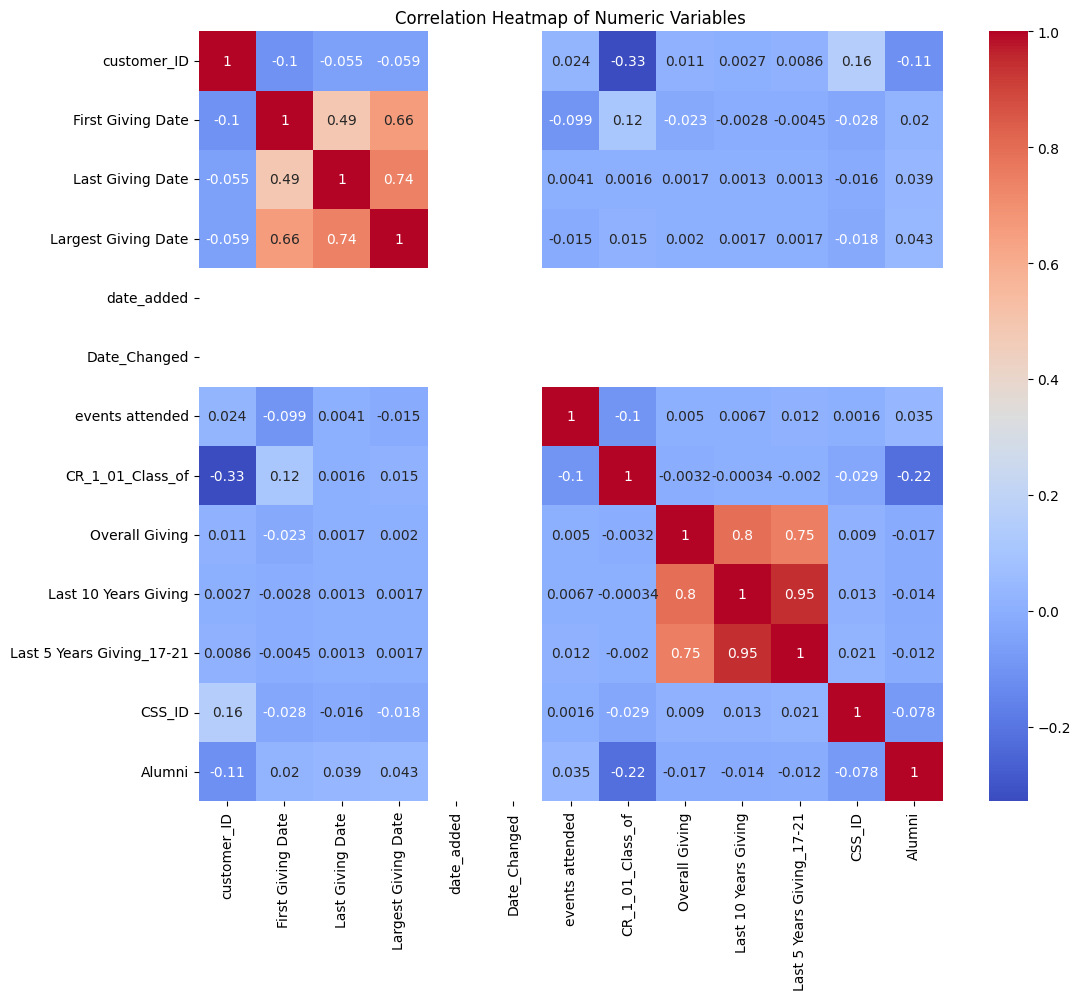

In [55]:
numeric_cols = processed_data.select_dtypes(include=[np.number]).columns
corr_matrix = processed_data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
# plt.savefig('correlation_heatmap.png')
# plt.close()
plt.plot();

- From this correlation heatmap, we can see that our target column "Overall Giving" is highly correlated with Last 10 year and Last 5 years of giving.

In [69]:
X = processed_donation.drop(['date_added','Date_Changed','Overall Giving'], axis=1)
y = processed_donation['Overall Giving']

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42287 entries, 0 to 42286
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_ID                42287 non-null  int64  
 1   Key Indicator              42287 non-null  object 
 2   Deceased                   42287 non-null  object 
 3   City                       42287 non-null  object 
 4   State                      42287 non-null  object 
 5   events attended            42287 non-null  int64  
 6   Zip                        42287 non-null  object 
 7   Prf_Type                   42287 non-null  object 
 8   CC_1_01_CodeLong           42287 non-null  object 
 9   Last 10 Years Giving       42287 non-null  float64
 10  Last 5 Years Giving_17-21  42287 non-null  float64
 11  Alumni                     42287 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 3.9+ MB


In [71]:
# Define numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [72]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

In [73]:
# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [74]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_ID',
                                                   'events attended',
                                                   'Last 10 Years Giving',
                                                   'Last 5 Years Giving_17-21',
                                                   'Alumni']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Key Indicator', 'Deceased',
                                                   'City', 'State', 'Zip',
                                                   'Prf_Type',
                                                   'CC_1_01_CodeLong'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [76]:
y_pred = model.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Model Performance:
Mean Squared Error: 8980090359.631956
R-squared Score: 0.07815105029252178


In [79]:
def predict_donation_prospects(data, threshold):
    predictions = model.predict(data)
    prospects = data[predictions > threshold]
    return prospects

high_value_prospects = predict_donation_prospects(X_test, threshold=1000)
print(high_value_prospects)

       customer_ID Key Indicator Deceased              City State  \
25021       237905             O       No         Worcester    MA   
24728       234091             I       No          Petoskey    MI   
30224       290500             O       No           Madison    WI   
12558        11710             I       No           Madison    WI   
41225       315767             O       No           Madison    WI   
...            ...           ...      ...               ...   ...   
30199       290283             I       No         Elm Grove    WI   
7602        437361             O       No           Madison    WI   
35250       352747             I       No  Prospect Heights    IL   
5821     100005984             I       No   Richland Center    WI   
13371        12862             I       No           Madison    WI   

       events attended         Zip              Prf_Type    CC_1_01_CodeLong  \
25021                0  01608-1724  Legal Home Permanent      Trust / Friend   
24728      

In [ ]:
import pickle

# Save the model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)